# Simple linear regression example in Python

This article demonstrates methods of solving the regresison task.

## Problem

Suppose, you're regular in buying goods on E-commerce sites and all you have is an invoice with its total sum.


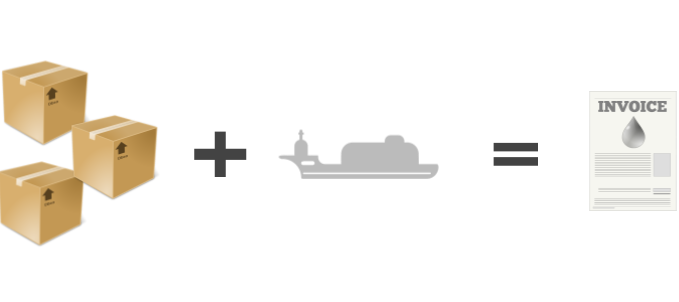

You wanna to know how much the shipment was cost and what is the price of one piece of goods.

The simplest way is to ask the supplier, of course )

But, not in our case because of we're mathematicians 🙄 !

## Input data

Suppose we have past three invoices

Raspberry PI, pcs | Cost and freight (CIF), $
---|---
1 | 5
2 | 8
3 | 11

> Let's assume also that the freight itself is invariant (fixed priced) and doesn't depends on number of pieces in the package.

## Taks math formalization

Firstly, we need to formulate the task in math manner to be able select appropriate model to solve it.
For each math problem exists one or more of models to solve it.

Once we transmit it into the math plane we can choose the model that covers our `business needs` (***business diligence***).

In this case our task mimics the simple linear quatation.

Indeed,

$$ {CIF = pieces \cdot cost + freight} $$

As we know (I hope you did) the basic 2D linear function  looks like this

$$ {\large y = f(x) = k \cdot x + b} \tag{1.1} $$

where
 - k - slope
 - b - offset on vertical axis (or ***bias***)

Let us represent this equations in slightly different manner:

$$ {\large y = f(x) = k \cdot x_1 + b \cdot x_0 } \tag{1.2} $$

where
 - $ { \large x_0 } $ always equal 1 (e.g., bias). As we know from preliminary school, multiplication of variable by 1 don't change result.

or, more formally,

$$ {\large y =  f(x) = w_0 \cdot x_0 + w_1 \cdot x_1 } \tag{1.3} $$

where
 - $ w_0, w_1 $ - weights (in terms of machine learning).

or in matrix format

$$ W = \begin{bmatrix} w_0 & w_1 \end{bmatrix} \qquad X = \begin{bmatrix}  x_0 \\ x_1 \end{bmatrix} \qquad y = f(x) = W \cdot X \tag{1.4} $$

Equation (1.3) is the simple linear regression equation.

The task is to estimate parameters W.

## Input data

For given rule

```
def f(x):
    return 3 * x + 2
```

Suppose, we have a 2D plot with sample points on it.
Based on it we want to estimate coefficients to be able plot other points
Suppose we have three points

$$ {\large \begin{array} {|| r | r ||} \hline x & y \\ \hline 1 & 5 \\ \hline 2 & 8 \\ \hline 3 & 11 \\ \hline \end{array} } $$

Or graphically

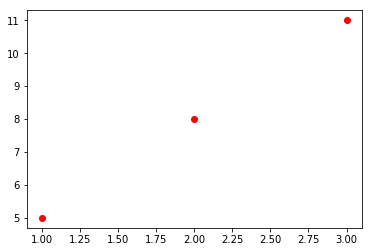

In [1]:
# import libraries for plotting and array initialization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# define data
X = np.arange(1, 4,dtype=np.float32)  # create array from 1 to 3 inclusive (both 1 and 3 included) with step 1

f = lambda x: 3 * x + 2
Y = f(X)


# Plot data
plt.plot(X, Y, 'ro')

## Task

For given input samples estimate its coefficients for predicting output

### Approach one. Normal equation

Before to dwelve into computational methods, let's try to solve our task using by **analitical approach** called **[Normal equation](https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/)**. The formula looks like this

$$ {\large W = (X^T X)^{-1} \cdot X^T \cdot Y} \tag{2} $$

But, before to using this formula, let's compose system of equations from input data above

$$ {\large   \begin{cases} 1 \cdot w_0 + 1 \cdot w_1 = 5 \\ 1 \cdot w_0 + 2 \cdot w_1 = 8 \\ 1 \cdot w_0 + 3 \cdot w_1 = 11 \end{cases} } $$

or in matrix format

$$ X = \begin{bmatrix}  x_{11}&x_{12} \\ x_{21}&x_{22} \\ x_{13} & x_{23} \end{bmatrix} = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix} $$

and

$$ Y = \begin{bmatrix}  y_{1} \\ y_{2} \\ y_{3} \end{bmatrix} = \begin{bmatrix}  5 \\ 8 \\ 11 \end{bmatrix} $$

Python code below implements formula (2) and prints ground truth coefficients $ w_0 = 2 $ and $ w_1 = 3 $

Tips: when define numpy arrays, it's commonly used to point ```dtype=np.float32```

In [2]:
# Basic math library in Python
import numpy as np


# Add bias column to the X values
X = np.c_[np.ones(X.shape[0]).T, X.T]

# Formula (2) in action
W_true = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)

# Print out results
# Value, calculated by normal equation is ground truth
print(W_true)

[2. 3.]


Normal equations is straightforward method of solving system of equations and can be applied in regression task we try to solve now.
It has pros and cons.

Pros
 - no need to choose learning rate $ \alpha $
 - don't need to iterate

Cons:
 - computational expensive $ O(n^3) $
 - slow if n very large

Because of its cons, it can be used only for small tasks.
For other regressinon analysis used **gradient descent** algorithm

### Gradient descent

**[gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)** is a technique to estimate parameters of the linear regression.

This algorithm is iterative and approximation




In [3]:
# Firstly, let's define our weights we need to estimate
# and initialize it by zeros
# its dimentsion (# of weights) equals #features (second dimension of X)
W = np.zeros(shape=(X.shape[1], 1))

# And set learning rate to 0.01
# (usually it vary form 0 to 1).
# The close to 0 means slowly learning
# close to 1 means faster learning
# Some algorithms automatically adjust learning rate
# starting from bigger value at the start of learning
# and slowly decreasing it when learning come to end
# You can play with its value to compare results
alpha = .01

loss = []

# We took 50 iterations
# #iterations can vary depending on task
# usually it lays between 50 - 1000 iterations
# depending on the network' complexity
# in our case we train simple linear regression
# so, 50 iterations enough
epochs = 50

# Other approach is to choose convergence limit
# and stop iterate when estimated value is close enough to the ground true
for i in range(epochs):
    # Firstly, calculate estimated value from formula (1.3)
    Y_hat = X.dot(W).T
    # Then, using MSE calc cost funciton, which estimate how accurately we calc predicted value
    cost = 2 * np.sum((Y_hat - Y) ** 2) / len(X)
    # Save our divergence for displaying our learning curve
    loss.append(cost)
    # Calc differential (most complicated and unloved part of this algorithm)
    dw = np.expand_dims(2 * np.sum(((Y_hat - Y)).dot(X), axis=0) / len(X), axis=0)
    # Adjust weights. Here we perform main task
    W -= alpha * dw.T

# Print estimated weights
print(f'Train loss: {cost}')
print(f'Weights: {W}')

Train loss: 0.0750150653171332
Weights: [[1.49063285]
 [3.21321668]]


For visualization purposes to determine how well does learning process let's plot the learning curve

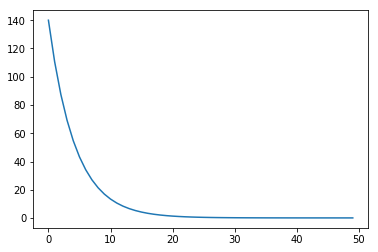

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(loss)

Learning curve used for evaluation of learning process.
If all ok, the curve should slowly decreases.
If it grows, it means smth goes wrong.


Some cases:

- Learning rate too high. Try to decrease it, for examle, 0.01 => 0.001
- Semantic error in algorithm (e.g., adding to gradient instead of subtract).


As shown from results above the estimated weights are slightly differ from ground truth values $ w_0 = 2 $ and $ w_1 = 3 $.

It was estimated intentionally to demonstrate how two approaches of solving the same task differs.

Plot below demonstrates input data, ground truth line, and predicted line.

To calculate weight more accurately, change learning rate $ \alpha = 0.1 $ and increase #iterations to 100.

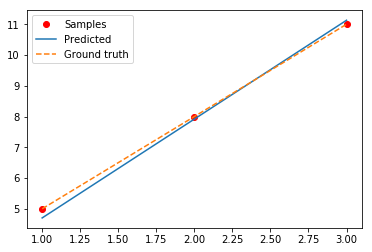

In [5]:
# Our formula (1.3)
y = lambda x, w: X.dot(w).T.squeeze()

plt.plot(X[:, 1], Y, 'ro', label='Samples')
plt.plot(X[:, 1], y(X, W), linestyle='solid', label='Predicted')
plt.plot(X[:, 1], y(X, W_true), linestyle='dashed', label='Ground truth')
plt.legend()

Optional Tensoflow and Keras
===

At the end let's see how to solve this task by means of high-level machine learning frameworks like [Tensorflow](https://www.tensorflow.org) and [keras](https://keras.io/models/model/)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Train loss: 0.15008240938186646
Weights: [array([[3.443092]], dtype=float32), array([0.9780786], dtype=float32)]


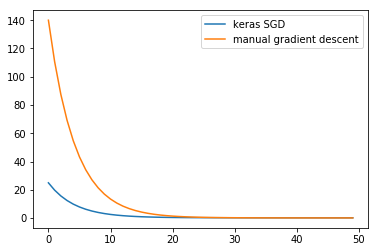

In [6]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')


history = model.fit(X[:, 1], Y, epochs=50, verbose=0)
plt.plot(history.history['loss'], label='keras SGD')
plt.plot(loss, label='manual gradient descent')
plt.legend()
print(f"Train loss: {history.history['loss'][-1]}")
print(f'Weights: {model.get_weights()}')

Depending on initialization step result above may vary. Sometime we can see from plot above, keras [SGD](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (stochastic gradient descent) acts more accurately at the start of the training but after 20 epochs the error becomes general for both implementations.


# Normalization

The examples above considered small set of real numbers

$$ X \in R^1 $$

e.g, 1, 2, 3, and so on up to 16 for which algorithm converges.

but if we take 17 numbers or more we'll get a situation when algorithm diverges instead of converge.
Examples below demonstrates this.

Train loss: 0.45013880729675293
Weights: [array([[3.120611]], dtype=float32), array([0.6060921], dtype=float32)]


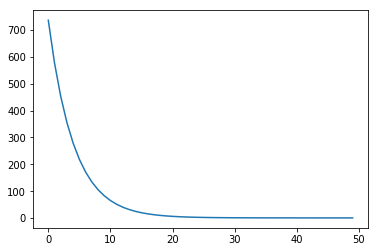

In [7]:
X = np.arange(1, 17, dtype=np.float32)  # numbers from 1 to 16 inclusive
Y = f(X)

model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
history = model.fit(X, Y, epochs=50, verbose=0)

print(f"Train loss: {history.history['loss'][-1]}")
print(f'Weights: {model.get_weights()}')

plt.plot(history.history['loss'])

Train loss: 30613948.0
Weights: [array([[-594.7806]], dtype=float32), array([-50.77951], dtype=float32)]


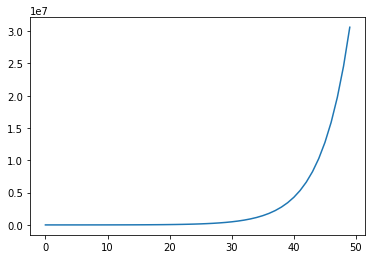

In [8]:
n = 18
X = np.arange(1, n, dtype=np.float32)  # numbers from 1 to 17 inclusive
Y = f(X)

model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
history = model.fit(X, Y, epochs=50, verbose=0)

print(f"Train loss: {history.history['loss'][-1]}")
print(f'Weights: {model.get_weights()}')

plt.plot(history.history['loss'], )

**Normalization** solves this issue.
There are types of normalization

 - Mean normalization
 - Min-max scaling
 - Standartization

Train loss: 144.255126953125
Weights: [array([[9.499868]], dtype=float32), array([18.439077], dtype=float32)]
Ground truth: 59, predicted: 37.830604553222656


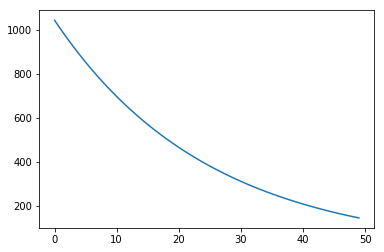

In [9]:
# #Samples, you can change this value to make sure it is not hurt model' convergence.
n = 18

X = np.arange(1, n, dtype=np.float32)  # numbers from 1 to (n-1) inclusive

# Normalization / feature scaling
# Most effective normalization for SGD
X_norm = (X - np.mean(X)) / np.std(X)

Y = f(X)

model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
# Train the model. For more accurate results try to increase #epochs, say to 500
history = model.fit(X_norm, Y, epochs=50, verbose=0)

print(f"Train loss: {history.history['loss'][-1]}")
print(f'Weights: {model.get_weights()}')

# Let's calc ground truth value for input value 19 using by f() lambda function
ground_truth = f(19)

# In contrast of line above, for predicted value we must normalize input data firstly
predicted =  model.predict([(19-np.mean(X))/np.std(X)])[0][0]
print('Ground truth: {}, predicted: {}'.format(ground_truth, predicted))

plt.plot(history.history['loss'])

# Summary

Gradient descent is simple to implement and effective method of solving linear regression tasks (but not limited to), represented in formula (1.3).
Simple linear regression (2) can also be multivariate linear regression (e.g., #features > 1 )

$$ {\large y =  f(x) = w_0 \cdot x_0 + w_1 \cdot x_1  + \dots + w_n \cdot x_n } \tag{1.4} $$

# Exercise

Play with learning rate $ \alpha $ and #iterations to estimate weights close enough to the ground truth (accuracy ~ 95%).